# Emotion prediction model

In [28]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model_best = load_model('../models/face_model.h5') # set your machine model file path here

# Classes 7 emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the pre-trained face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open a connection to the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y + h, x:x + w]

        # Resize the face image to the required input size for the model
        face_image = cv2.resize(face_roi, (48, 48))
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        face_image = image.img_to_array(face_image)
        face_image = np.expand_dims(face_image, axis=0)
        face_image = np.vstack([face_image])

        # Predict emotion using the loaded model
        predictions = model_best.predict(face_image)
        emotion_label = class_names[np.argmax(predictions)]

        # Display the emotion label on the frame
        cv2.putText(frame, f'{emotion_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 0, 255), 2)

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model_best = load_model('../models/face_model.h5') # set your machine model file path here

# Classes 7 emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the pre-trained face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

video_path = '../uploads/video.mp4' 
cap = cv2.VideoCapture(video_path)
emotion_hist = []
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break 
    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y + h, x:x + w]

        # Resize the face image to the required input size for the model
        face_image = cv2.resize(face_roi, (48, 48))
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        face_image = image.img_to_array(face_image)
        face_image = np.expand_dims(face_image, axis=0)
        face_image = np.vstack([face_image])

        # Predict emotion using the loaded model
        predictions = model_best.predict(face_image)
        emotion_label = class_names[np.argmax(predictions)]
        emotion_hist.append(emotion_label)

        # Display the emotion label on the frame
        cv2.putText(frame, f'Emotion: {emotion_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 0, 255), 2)

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

print(emotion_hist)

emotion_counter = {}
for element in emotion_hist:
    if element in emotion_counter:
        emotion_counter[element] += 1
    else:
        emotion_counter[element] = 1

# Calculer le pourcentage de présence
total = len(emotion_hist)
pourcentages = {}
for cle, val in emotion_counter.items():
    pourcentages[cle] = (val / total) * 100

# Affichage des résultats
pourcentages = sorted(pourcentages.items(), key=lambda x: x[1], reverse=True)
print(pourcentages)

1/1 [==============================] - 0s 27ms/step
['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', '

# Tweet clustering model

In [ ]:
import pandas as pd

# Charger le dataset (exemple avec un fichier CSV)
df = pd.read_csv("tweets.csv")  # Remplacez par votre fichier

# Vérifier si la colonne "content" existe
if "content" in df.columns:
    # Extraire uniquement la colonne "content"
    df_content = df[["content"]]  # Double crochets pour garder un DataFrame

    # Enregistrer dans un nouveau fichier CSV
    df_content.to_csv("tweets_content.csv", index=False)  # index=False pour ne pas enregistrer l'index

    print("Le fichier 'tweets_content.csv' a été créé avec succès !")
else:
    print("Erreur : La colonne 'content' n'existe pas dans le dataset.")


Le fichier 'tweets_content.csv' a été créé avec succès !


## Nettoyage et tokenisation BERT des tweets

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
import pandas as pd
import re
import emoji
import unicodedata

# Chargement du tokenizer et du modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Fonction pour obtenir les embeddings BERT d'un tweet
def get_bert_embeddings(tweet_text):
    # Tokenisation
    inputs = tokenizer(tweet_text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    
    # Passer les tokens dans le modèle BERT pour obtenir les embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    
    # L'output du modèle BERT est un tuple où le premier élément est le dernier état caché
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Moyenne des embeddings de tous les tokens
    return embeddings.squeeze().numpy()


def clean_tweet(tweet):
    # 1. Convertir en minuscules
    tweet = tweet.lower()
    
    # 2. Supprimer les URLs
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)
    
    # 3. Supprimer les caractères spéciaux sauf ceux utiles (ex. !, ?, #, @)
    tweet = re.sub(r"[^a-zA-Z0-9@#?!'\s]", '', tweet)
    
    # 4. Réduire les lettres répétées
    tweet = re.sub(r'(.)\1{2,}', r'\1\1', tweet)  # Remplace toute répétition de 3+ par 2 lettres
    
    # 5. Supprimer les espaces multiples
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    # 6. Convertir les emojis en texte lisible (ex. 😂 -> ":joy:")
    tweet = emoji.demojize(tweet, delimiters=(" ", " "))  # Garde les emojis sous forme de texte
    
    # 7. Normaliser les caractères (ex. caractères accentués → version simple)
    tweet = unicodedata.normalize("NFKC", tweet)
    
    return tweet




In [4]:
import pandas as pd

df = pd.read_csv("tweets_content.csv")
tweets = df["content"].dropna().tolist()

In [ ]:

print('cleaning tweets')
cleaned_tweets = np.array([clean_tweet(tweet) for tweet in tweets])
print('tokenizing tweets')
bert_embeddings = []
total_tweets = len(cleaned_tweets)  # Longueur totale

for idx, tweet in enumerate(cleaned_tweets, start=1):  # start=1 pour un affichage plus lisible
    print(f"Processing tweet {idx}/{total_tweets}...")
    bert_embeddings.append(get_bert_embeddings(tweet))

bert_embeddings = np.array(bert_embeddings)

c:\Users\damie\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



cleaning tweets
tokenizing tweets
Processing tweet 1/52542...
Processing tweet 2/52542...
Processing tweet 3/52542...
Processing tweet 4/52542...
Processing tweet 5/52542...
Processing tweet 6/52542...
Processing tweet 7/52542...
Processing tweet 8/52542...
Processing tweet 9/52542...
Processing tweet 10/52542...
Processing tweet 11/52542...
Processing tweet 12/52542...
Processing tweet 13/52542...
Processing tweet 14/52542...
Processing tweet 15/52542...
Processing tweet 16/52542...
Processing tweet 17/52542...
Processing tweet 18/52542...
Processing tweet 19/52542...
Processing tweet 20/52542...
Processing tweet 21/52542...
Processing tweet 22/52542...
Processing tweet 23/52542...
Processing tweet 24/52542...
Processing tweet 25/52542...
Processing tweet 26/52542...
Processing tweet 27/52542...
Processing tweet 28/52542...
Processing tweet 29/52542...
Processing tweet 30/52542...
Processing tweet 31/52542...
Processing tweet 32/52542...
Processing tweet 33/52542...
Processing tweet 

c:\Users\damie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\damie\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\damie\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


                                                   tweet  cluster
0      Is history repeating itself...?#DONTNORMALIZEH...        9
1      @barackobama Thank you for your incredible gra...        2
2                    Life goals. https://t.co/XIn1qKMKQl        5
3                Me right now 🙏🏻 https://t.co/gW55C1wrwd        5
4      SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...        6
...                                                  ...      ...
52537               Life couldn't be better right now. 😊        6
52538  First Monday back in action. I'd say 21.6 mile...        6
52539  Crime shows, buddy, snuggles = the perfect Sun...        6
52540                          ❄️ http://t.co/sHCFdPpGPa        8
52541                      ❤️❄️✈️ http://t.co/ixmB5lv17Z        8

[52542 rows x 2 columns]

Centroids of clusters:
[[ 0.23836252  0.01853153  0.45898667 ... -0.18670319  0.00683377
  -0.10053028]
 [ 0.2289422   0.20184225  0.59537715 ... -0.26356065  0.06197681
   0.024548

### Enregistrement des tweets tokenisés

In [2]:
import json


with open("tokenized_tweets_content.json", "w", encoding="utf-8") as f:
    json.dump(bert_embeddings.tolist(), f, ensure_ascii=False, indent=4)

print("Fichier data.json enregistré.")


NameError: name 'bert_embeddings' is not defined

In [2]:
import json
import numpy as np

bert_embeddings = np.array(json.load(open("BERT_tokenized_tweets_content.json", "r", encoding="utf-8")))

## Entrainement du model KMEANS

In [5]:
from sklearn.cluster import KMeans
import pandas as pd

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20, max_iter=500)
kmeans.fit(bert_embeddings)

# Ajouter les résultats de la clusterisation au DataFrame
df = pd.DataFrame({'tweet': tweets, 'cluster': kmeans.labels_})

# Afficher les résultats de la clusterisation
print(df)


                                                   tweet  cluster
0      Is history repeating itself...?#DONTNORMALIZEH...        7
1      @barackobama Thank you for your incredible gra...        2
2                    Life goals. https://t.co/XIn1qKMKQl        5
3                Me right now 🙏🏻 https://t.co/gW55C1wrwd        5
4      SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...        3
...                                                  ...      ...
52537               Life couldn't be better right now. 😊        3
52538  First Monday back in action. I'd say 21.6 mile...        3
52539  Crime shows, buddy, snuggles = the perfect Sun...        3
52540                          ❄️ http://t.co/sHCFdPpGPa        4
52541                      ❤️❄️✈️ http://t.co/ixmB5lv17Z        4

[52542 rows x 2 columns]


In [6]:
import joblib

joblib.dump(kmeans, "../models/kmeans_model.pkl")

['../models/kmeans_model.pkl']

In [7]:

kmeans = joblib.load("../models/kmeans_model.pkl")


In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def generate_graph(embeddings):

  # Réduction de dimension avec t-SNE (768D -> 2D)
  perplexity_value = n_clusters -1
  tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
  X_embedded = tsne.fit_transform(embeddings)

  # Affichage des clusters
  plt.figure(figsize=(10, 6))
  scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans.labels_, cmap='tab10', alpha=0.5, edgecolors='k')


  # Ajouter les centres des clusters projetés en 2D
  centroids_2d = tsne.fit_transform(kmeans.cluster_centers_)
  plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label="Centres")

  plt.xlabel("t-SNE Dimension 1")
  plt.ylabel("t-SNE Dimension 2")
  plt.title("Visualisation des clusters K-Means (t-SNE)")
  plt.legend()
  plt.show()

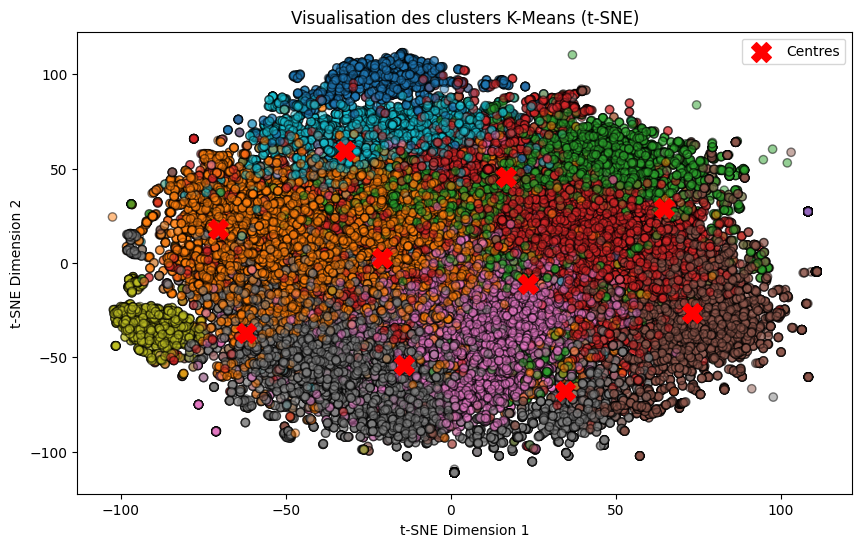

In [9]:

generate_graph(bert_embeddings)

### Silhouette score

In [35]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(bert_embeddings, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.05139335703802839


### Tweets sample

In [36]:
def tweets_sample(df):
  
  # Nombre de tweets à afficher par cluster
  n_samples = 10

  # Stocker les échantillons dans une liste
  samples = []

  for cluster_id in range(n_clusters):  # Parcours de chaque cluster
      sample_tweets = df[df['cluster'] == cluster_id].sample(n=n_samples, random_state=42)  # Prendre 10 tweets aléatoirement
      for tweet in sample_tweets['tweet']:
          samples.append((cluster_id, tweet))  # Ajouter le tweet et son cluster

  # Création du DataFrame final
  df_samples = pd.DataFrame(samples, columns=['Cluster', 'Tweet'])

  # Affichage
  for cluster_id in range(n_clusters):  # Parcours de chaque cluster

    print(df_samples[df_samples['Cluster'] == cluster_id])

In [37]:
tweets_sample(df)


   Cluster                                              Tweet
0        0  Four Americans were killed in attack in Afghan...
1        0  At least 30 people were killed in a blast at a...
2        0  N. Korea fired a ballistic missile around 7:50...
3        0  Donald Trump offers Iowa Gov. Terry Branstad t...
4        0  Ft. Lauderdale airport shooting suspect Esteba...
5        0  U.S. Rep. Mark Takai of Hawaii dies at 49. htt...
6        0  OLYMPICS: Ryan Murphy of Team USA wins men's 2...
7        0  Police force identifies cop who shot and kille...
8        0  OLYMPICS: Ledecky anchors U.S. women’s 4 x 200...
9        0  Former Jets RB Joe McKnight was fatally shot i...
    Cluster                                              Tweet
10        1  And for the fly girls in the U.S. Im very happ...
11        1  I'm back from Spring Break! Can't wait to chat...
12        1  The #SuperBowl is almost here! Here's tips for...
13        1  The second half of #AZvsSF kicks off now.\r\n\...
14 

## Réduction des dimensions

### Elbow Method

nombre de cluster:1 - inertie: [1752579.8138525595]
nombre de cluster:2 - inertie: [1752579.8138525595, 1623327.981716017]
nombre de cluster:3 - inertie: [1752579.8138525595, 1623327.981716017, 1531938.5358344547]
nombre de cluster:4 - inertie: [1752579.8138525595, 1623327.981716017, 1531938.5358344547, 1474510.321678748]
nombre de cluster:5 - inertie: [1752579.8138525595, 1623327.981716017, 1531938.5358344547, 1474510.321678748, 1427383.4345408936]
nombre de cluster:6 - inertie: [1752579.8138525595, 1623327.981716017, 1531938.5358344547, 1474510.321678748, 1427383.4345408936, 1408594.4206245753]
nombre de cluster:7 - inertie: [1752579.8138525595, 1623327.981716017, 1531938.5358344547, 1474510.321678748, 1427383.4345408936, 1408594.4206245753, 1364668.6222211292]
nombre de cluster:8 - inertie: [1752579.8138525595, 1623327.981716017, 1531938.5358344547, 1474510.321678748, 1427383.4345408936, 1408594.4206245753, 1364668.6222211292, 1345011.445292647]
nombre de cluster:9 - inertie: [17525

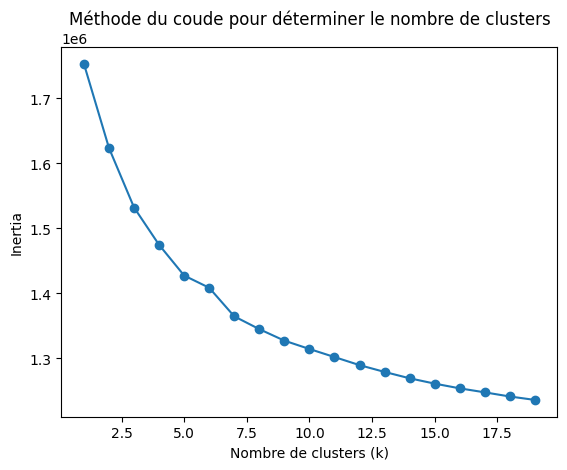

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Liste des valeurs de k à tester
inertia = []
k_range = range(1, 20)  # Teste de 1 à 20 clusters

# Teste plusieurs valeurs de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(bert_embeddings)
    inertia.append(kmeans.inertia_)

# Affichage du graphique du coude
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour déterminer le nombre de clusters')
plt.show()


coude à 6 ou 7 cluster

In [39]:
from sklearn.cluster import KMeans
import pandas as pd

n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20, max_iter=500)
kmeans.fit(bert_embeddings)

# Ajouter les résultats de la clusterisation au DataFrame
df = pd.DataFrame({'tweet': tweets, 'cluster': kmeans.labels_})

# Afficher les résultats de la clusterisation
print(df)


                                                   tweet  cluster
0      Is history repeating itself...?#DONTNORMALIZEH...        6
1      @barackobama Thank you for your incredible gra...        2
2                    Life goals. https://t.co/XIn1qKMKQl        3
3                Me right now 🙏🏻 https://t.co/gW55C1wrwd        3
4      SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...        4
...                                                  ...      ...
52537               Life couldn't be better right now. 😊        4
52538  First Monday back in action. I'd say 21.6 mile...        4
52539  Crime shows, buddy, snuggles = the perfect Sun...        4
52540                          ❄️ http://t.co/sHCFdPpGPa        5
52541                      ❤️❄️✈️ http://t.co/ixmB5lv17Z        5

[52542 rows x 2 columns]


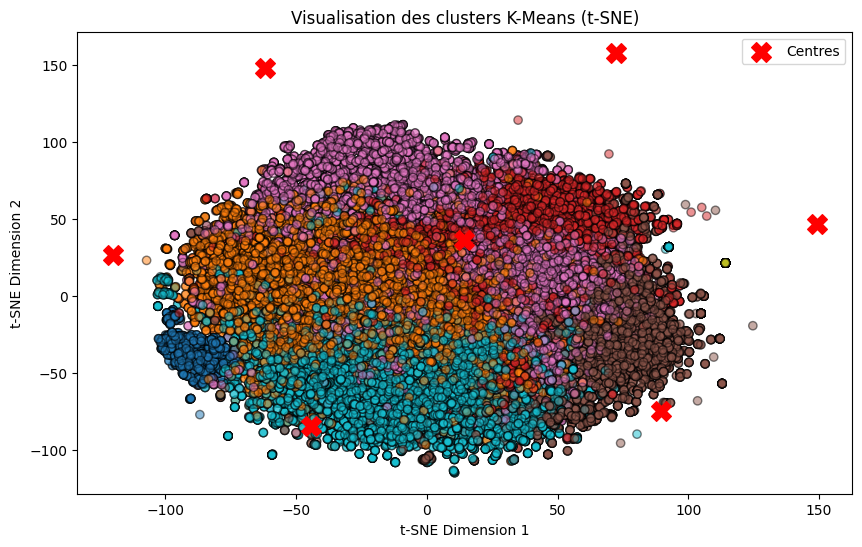

In [41]:
generate_graph(bert_embeddings)

### Silhouette score

In [42]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(bert_embeddings, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.04883367375904738


### Tweets sample

In [43]:
tweets_sample(df)

   Cluster                                              Tweet
0        0  FOTO: En el sur de Francia, donde me encuentro...
1        0  Muy emocionante ver en los #PremiosALASBid más...
2        0  ¿Quieren ver el cómo se hizo del vídeo #CantRe...
3        0  Dale un besito de mi parte! Shak RT @yosoylaVi...
4        0  En la campiña Francesa con los Pirineos al fon...
5        0  Wow, 80 million fans on Facebook?! You all mak...
6        0  Acabamos de conocer que #Chantaje con @maluma ...
7        0  No se pierdan este video de Shak cantando en v...
8        0  Avó, estás sempre no meu coração. Descanse em ...
9        0  MUCHAS GRACIAS a todos los que han participado...
    Cluster                                              Tweet
10        1  Remember these pics? We're finally showing thi...
11        1  Like always, I’m supporting @FloydMayweather t...
12        1  Why thank you! I have more stories to share! #...
13        1  Los Angeles... My boys, @theshadowboxers are p...
14 

## Tokenisation Sentence transformers

In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

cleaned_tweets = np.array([clean_tweet(tweet) for tweet in tweets])

sentence_embeddings = model.encode(cleaned_tweets)
print(sentence_embeddings.shape)


(52542, 384)


### entrainement KMEANs

In [47]:
from sklearn.cluster import KMeans
import pandas as pd

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20, max_iter=500)
kmeans.fit(sentence_embeddings)

# Ajouter les résultats de la clusterisation au DataFrame
df = pd.DataFrame({'tweet': tweets, 'cluster': kmeans.labels_})

# Afficher les résultats de la clusterisation
print(df)


                                                   tweet  cluster
0      Is history repeating itself...?#DONTNORMALIZEH...        2
1      @barackobama Thank you for your incredible gra...        9
2                    Life goals. https://t.co/XIn1qKMKQl        8
3                Me right now 🙏🏻 https://t.co/gW55C1wrwd        0
4      SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...        7
...                                                  ...      ...
52537               Life couldn't be better right now. 😊        2
52538  First Monday back in action. I'd say 21.6 mile...        0
52539  Crime shows, buddy, snuggles = the perfect Sun...        4
52540                          ❄️ http://t.co/sHCFdPpGPa        5
52541                      ❤️❄️✈️ http://t.co/ixmB5lv17Z        5

[52542 rows x 2 columns]


### Représentation graphique

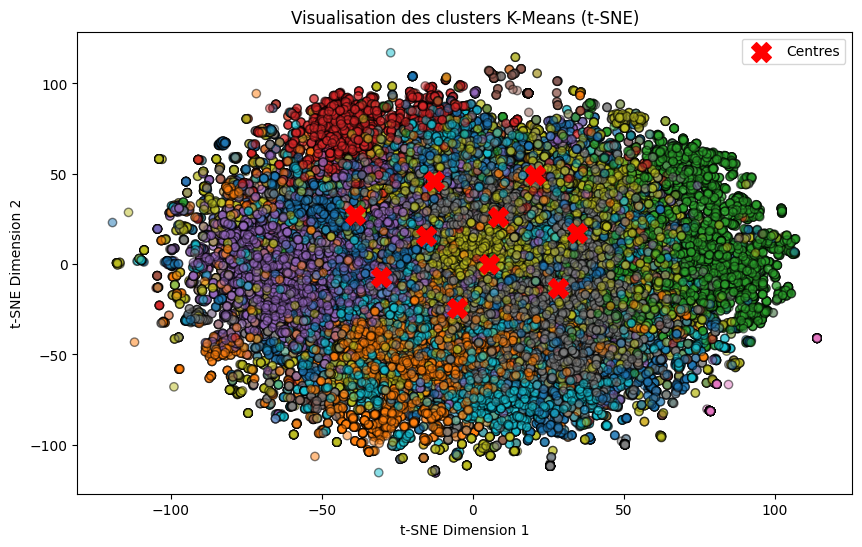

In [48]:
generate_graph(sentence_embeddings)

### Silhouette score

In [49]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(bert_embeddings, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: -0.0030114034826119684


### Tweets sample

In [50]:
tweets_sample(df)

   Cluster                                              Tweet
0        0  Today is Thanksgiving in the US! Watch our Ins...
1        0  Are you rolling with @IGGYAZALEA’s team? https...
2        0  Seven days until #RED- seven band members' fee...
3        0  It’s #NationalIceCreamDay! One scoop or two? 🍦...
4        0  Hashtag game! Tweet out a funny, weird, or emb...
5        0  “@AaronRodgers12: Can't wait for Game of Thron...
6        0  #NAVY we're coming for you! #TheMonsterTour RS...
7        0  I’m back, Vegas!! See you at #PieceOfMe tonigh...
8        0  Here's a lil information on how you can meet m...
9        0  You have two hours to prepare (binge) for #The...
    Cluster                                              Tweet
10        1  #Bonding :) RT @iamwill I had a good vibe sess...
11        1  I see you, Funches!!! @RonFunches @gwenstefani...
12        1  @TheKiaraAna @Adrienne_Woods @ChrysantheTan I ...
13        1                                  i love you babies
14 

## Réduction des dimensions

### Elbow Method

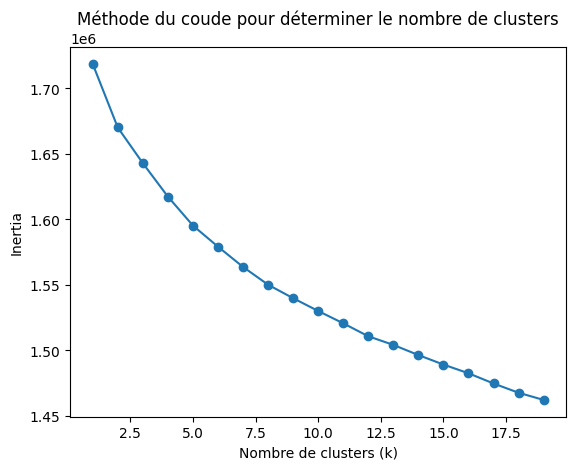

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Liste des valeurs de k à tester
inertia = []
k_range = range(1, 20)  # Teste de 1 à 20 clusters

# Teste plusieurs valeurs de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sentence_embeddings)
    inertia.append(kmeans.inertia_)

# Affichage du graphique du coude
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour déterminer le nombre de clusters')
plt.show()


### Entrainement KMEANS

In [52]:
from sklearn.cluster import KMeans
import pandas as pd

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20, max_iter=500)
kmeans.fit(sentence_embeddings)

# Ajouter les résultats de la clusterisation au DataFrame
df = pd.DataFrame({'tweet': tweets, 'cluster': kmeans.labels_})

# Afficher les résultats de la clusterisation
print(df)


                                                   tweet  cluster
0      Is history repeating itself...?#DONTNORMALIZEH...        2
1      @barackobama Thank you for your incredible gra...        9
2                    Life goals. https://t.co/XIn1qKMKQl        8
3                Me right now 🙏🏻 https://t.co/gW55C1wrwd        0
4      SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...        7
...                                                  ...      ...
52537               Life couldn't be better right now. 😊        2
52538  First Monday back in action. I'd say 21.6 mile...        0
52539  Crime shows, buddy, snuggles = the perfect Sun...        4
52540                          ❄️ http://t.co/sHCFdPpGPa        5
52541                      ❤️❄️✈️ http://t.co/ixmB5lv17Z        5

[52542 rows x 2 columns]


### Représentation graphique

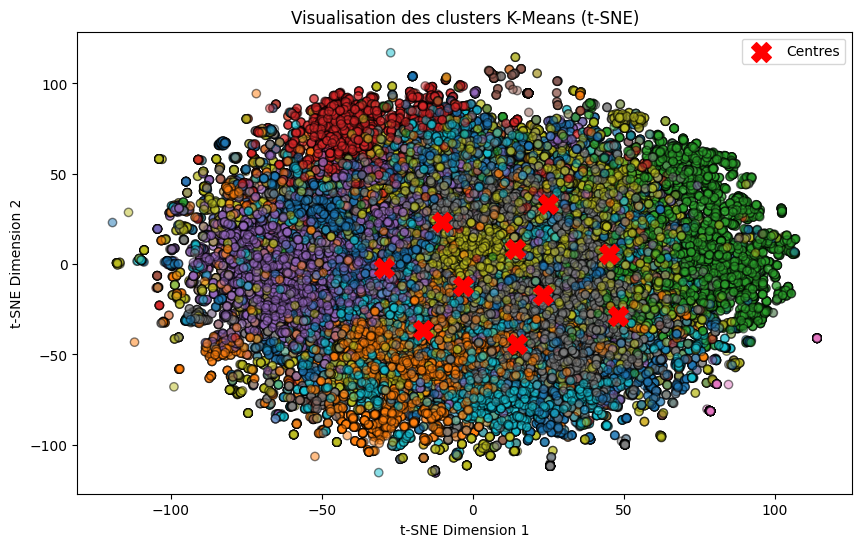

In [53]:
generate_graph(sentence_embeddings)

### Silhouette score

In [54]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(bert_embeddings, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: -0.0030114034826119684


### Tweets sample

In [55]:
tweets_sample(df)

   Cluster                                              Tweet
0        0  Today is Thanksgiving in the US! Watch our Ins...
1        0  Are you rolling with @IGGYAZALEA’s team? https...
2        0  Seven days until #RED- seven band members' fee...
3        0  It’s #NationalIceCreamDay! One scoop or two? 🍦...
4        0  Hashtag game! Tweet out a funny, weird, or emb...
5        0  “@AaronRodgers12: Can't wait for Game of Thron...
6        0  #NAVY we're coming for you! #TheMonsterTour RS...
7        0  I’m back, Vegas!! See you at #PieceOfMe tonigh...
8        0  Here's a lil information on how you can meet m...
9        0  You have two hours to prepare (binge) for #The...
    Cluster                                              Tweet
10        1  #Bonding :) RT @iamwill I had a good vibe sess...
11        1  I see you, Funches!!! @RonFunches @gwenstefani...
12        1  @TheKiaraAna @Adrienne_Woods @ChrysantheTan I ...
13        1                                  i love you babies
14 

# Représentation graphique umap

c:\Users\damie\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


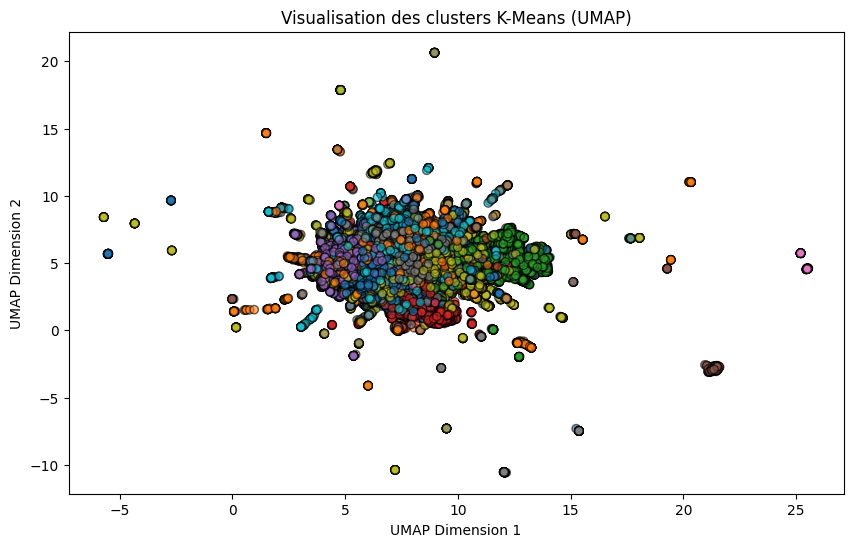

In [56]:
import umap.umap_ as umap

reducer = umap.UMAP(n_components=2, random_state=42)
X_embedded = reducer.fit_transform(sentence_embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans.labels_, cmap='tab10', alpha=0.6, edgecolors='k')

plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Visualisation des clusters K-Means (UMAP)")
plt.show()


# hdbscan clustering

In [ ]:
from hdbscan import HDBSCAN
clusterer = HDBSCAN(min_cluster_size=7)
labels = clusterer.fit_predict(sentence_embeddings)

df = pd.DataFrame({'tweet': tweets, 'cluster': labels})

# Afficher les résultats de la clusterisation
print(df)


In [ ]:
df = pd.DataFrame({'tweet': tweets, 'cluster': labels})

print(df)

                                                   tweet  cluster
0      Is history repeating itself...?#DONTNORMALIZEH...       -1
1      @barackobama Thank you for your incredible gra...       -1
2                    Life goals. https://t.co/XIn1qKMKQl       -1
3                Me right now 🙏🏻 https://t.co/gW55C1wrwd       -1
4      SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...       -1
...                                                  ...      ...
52537               Life couldn't be better right now. 😊       -1
52538  First Monday back in action. I'd say 21.6 mile...       -1
52539  Crime shows, buddy, snuggles = the perfect Sun...       -1
52540                          ❄️ http://t.co/sHCFdPpGPa       34
52541                      ❤️❄️✈️ http://t.co/ixmB5lv17Z       34

[52542 rows x 2 columns]


c:\Users\damie\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


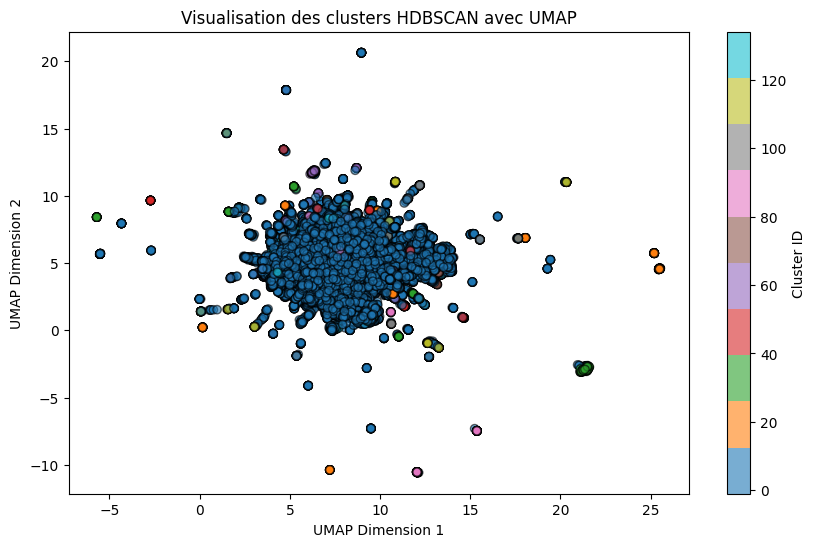

In [13]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Réduction de dimension avec UMAP (768D -> 2D)
reducer = umap.UMAP(n_components=2, random_state=42)
X_embedded = reducer.fit_transform(sentence_embeddings)

# Affichage des clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='tab10', alpha=0.6, edgecolors='k')

plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Visualisation des clusters HDBSCAN avec UMAP")
plt.colorbar(label="Cluster ID")
plt.show()


In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(sentence_embeddings, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.13959828
